In [1]:
#!pip install scikit-learn

In [2]:
import sklearn
print(sklearn.__version__)
import joblib

1.6.1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, 
    classification_report 
) 

In [5]:
import os
os.getcwd()


'C:\\Users\\Jemi Patel'

In [11]:
df = pd.read_csv("Documents/loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [13]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [14]:
df.columns = df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

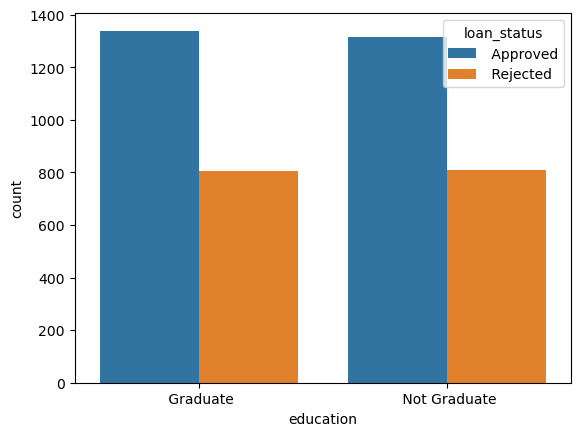

Higher education levels are associated with increased chances of loan approval, but education does not have major impact on Loan Approval Status


In [15]:
sns.countplot(x = df["education"], data = df, hue = "loan_status")
plt.show()
print("Higher education levels are associated with increased chances of loan approval, but education does not have major impact on Loan Approval Status")

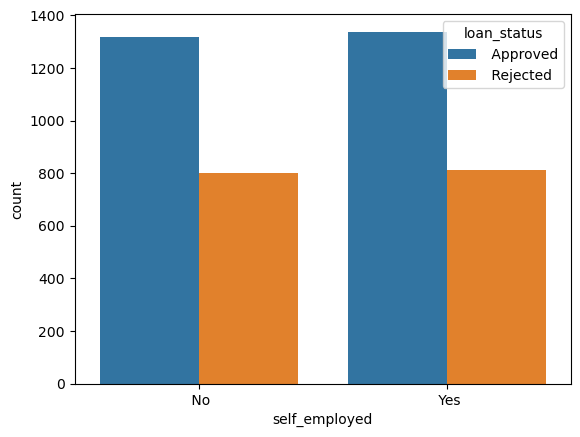

Self-employment status appears to have minimal impact on loan approval, with similar approval rates observed for both groups.


In [16]:
        sns.countplot(x = df["self_employed"], data = df, hue = "loan_status")
        plt.show()
        print("Self-employment status appears to have minimal impact on loan approval, with similar approval rates observed for both groups.")

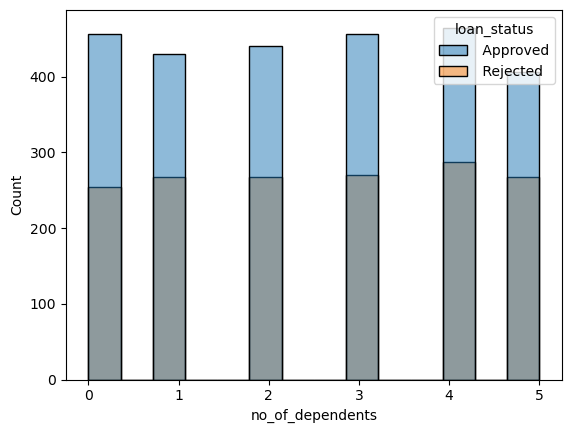

The chart indicates that loan approval rates remain fairly consistent across different numbers of dependents, suggesting limited impact.


In [17]:
sns.histplot(x = df["no_of_dependents"], data = df, hue = "loan_status")
plt.show()
print("The chart indicates that loan approval rates remain fairly consistent across different numbers of dependents, suggesting limited impact.")

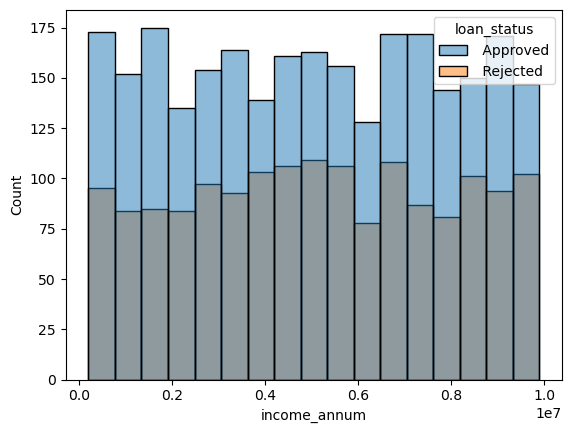

Higher annual income seems to boost loan approval chances, with approvals rising noticeably in the upper income ranges.


In [18]:
sns.histplot(x = df["income_annum"], data = df, hue = "loan_status")
plt.show()
print("Higher annual income seems to boost loan approval chances, with approvals rising noticeably in the upper income ranges.")

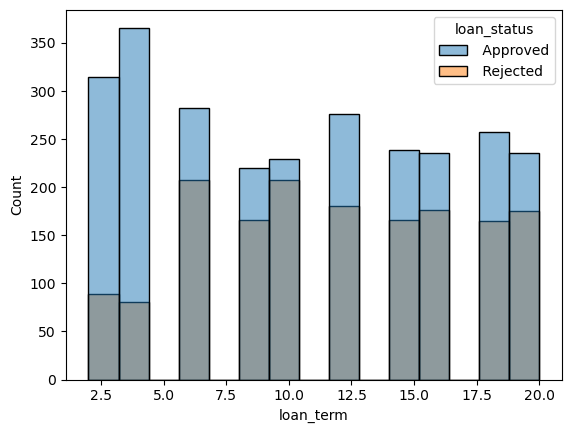

Loan approval rates stay fairly consistent across different loan terms, showing no strong impact from term duration.


In [19]:
sns.histplot(x = df["loan_term"], data = df, hue = "loan_status")
plt.show()
print("Loan approval rates stay fairly consistent across different loan terms, showing no strong impact from term duration.")

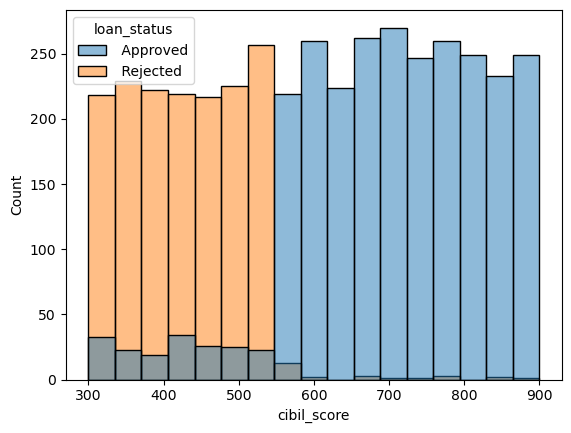

Higher CIBIL scores clearly boost loan approval chances, with approvals rising steadily as scores increase.


In [20]:
sns.histplot(x = df["cibil_score"], data = df, hue = "loan_status")
plt.show()
print("Higher CIBIL scores clearly boost loan approval chances, with approvals rising steadily as scores increase.")

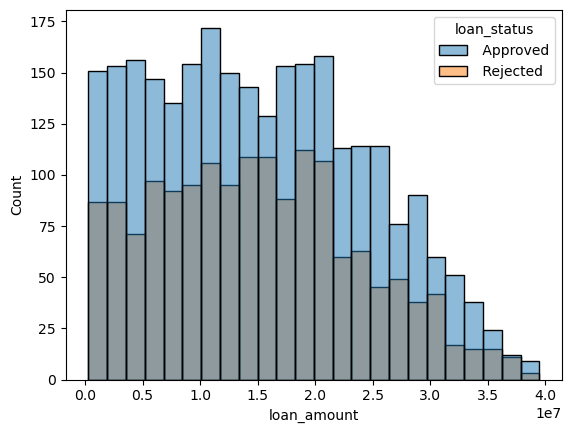

Loan approval chances tend to drop as the loan amount increases, showing a clear preference for smaller loans.


In [21]:
sns.histplot(x = df["loan_amount"], data = df, hue = "loan_status")
plt.show()
print("Loan approval chances tend to drop as the loan amount increases, showing a clear preference for smaller loans.")

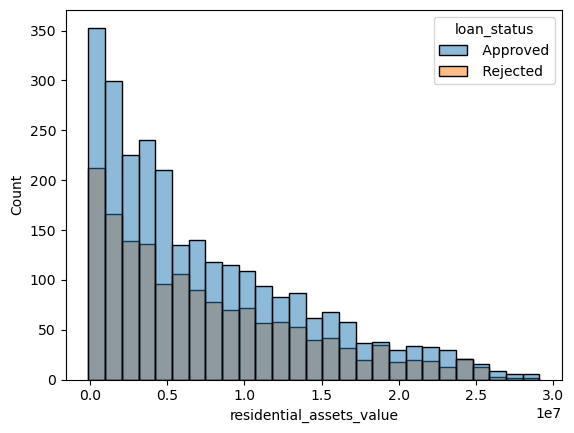

Loan approvals tend to increase with higher residential asset values, showing a positive link between asset strength and approval chances.


In [22]:
sns.histplot(x = df["residential_assets_value"], data = df, hue = "loan_status")
plt.show()
print("Loan approvals tend to increase with higher residential asset values, showing a positive link between asset strength and approval chances.")

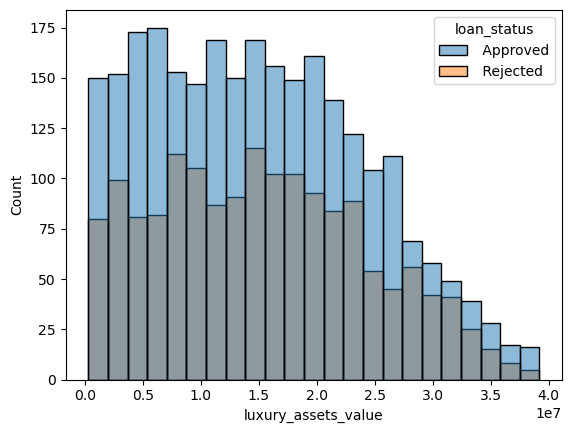

Loan approvals slightly increase with higher luxury asset values, suggesting a modest positive influence on approval chances.


In [23]:
sns.histplot(x = df["luxury_assets_value"], data = df, hue = "loan_status")
plt.show()
print("Loan approvals slightly increase with higher luxury asset values, suggesting a modest positive influence on approval chances.")

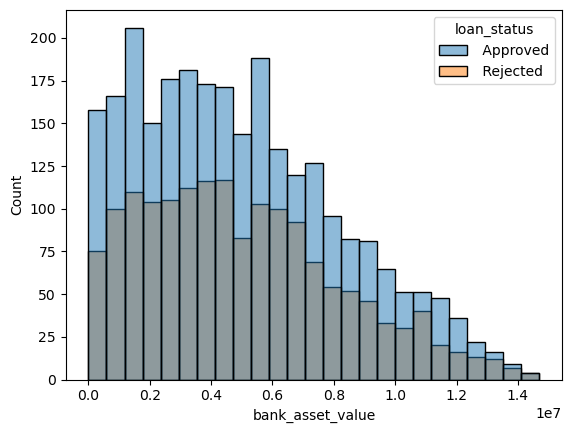

Loan approvals are more common when bank asset values are higher, showing a clear positive impact on approval chances.


In [24]:
sns.histplot(x = df["bank_asset_value"], data = df, hue = "loan_status")
plt.show()
print("Loan approvals are more common when bank asset values are higher, showing a clear positive impact on approval chances.")

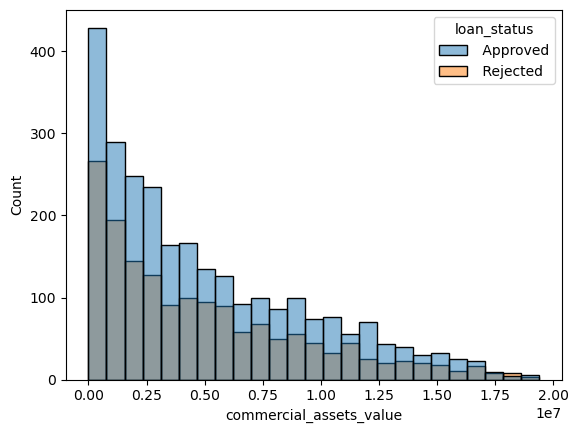

Loan approvals tend to rise with higher commercial asset values, showing a positive impact on approval chances.


In [25]:
sns.histplot(x = df["commercial_assets_value"], data = df, hue = "loan_status")
plt.show()
print("Loan approvals tend to rise with higher commercial asset values, showing a positive impact on approval chances.")

In [26]:
df["loan_status"].unique()

array([' Approved', ' Rejected'], dtype=object)

In [27]:
df["loan_status"] = df["loan_status"].str.strip()

In [28]:
df["loan_status"] = df["loan_status"].map({"Approved": 1, "Rejected": 0})
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [29]:
df["education"] = df["education"].astype(str).str.strip()
df["self_employed"] = df["self_employed"].astype(str).str.strip()

In [30]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [31]:
df["education"] = df["education"].map({'Graduate': 1, 'Not Graduate': 0})
df["self_employed"] = df["self_employed"].map({'Yes': 1, 'No': 0})
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [32]:
print(df.columns.tolist())

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [33]:
features = [
    'no_of_dependents', 'education', 'self_employed',
    'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'
]
X = df[features].copy()
Y = df["loan_status"]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.2, stratify = Y, random_state = 42
)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
from imblearn.over_sampling import SMOTE

Accuracy: 0.7822014051522248
Precision: 0.8212290502793296
Recall: 0.8305084745762712
F1 Score: 0.8258426966292135
ROC-AUC: 0.8588736713835102


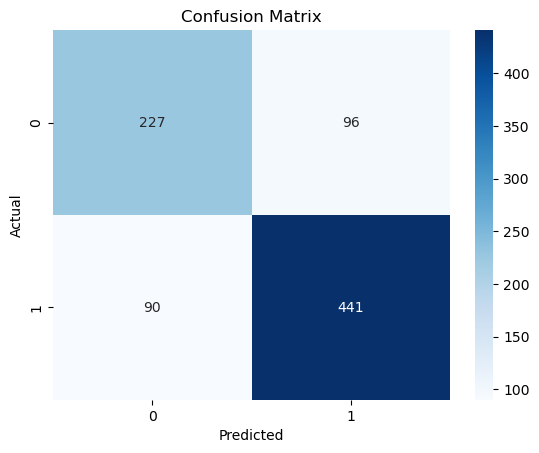

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       323
           1       0.82      0.83      0.83       531

    accuracy                           0.78       854
   macro avg       0.77      0.77      0.77       854
weighted avg       0.78      0.78      0.78       854

Feature Importance (from model coefficients):
                    Feature   Coefficient
5               cibil_score  6.742429e-03
3               loan_amount  1.532644e-08
6  residential_assets_value -8.390027e-09
7   commercial_assets_value -1.454563e-08
8       luxury_assets_value -5.943490e-08
9          bank_asset_value -6.297694e-08
1                 education -2.277943e-03
2             self_employed -2.350601e-03
0          no_of_dependents -3.212347e-02
4                 loan_term -2.000493e-01
Model saved successfully!


In [38]:
#  Use SMOTE if imbalance exists
smote = SMOTE(random_state=42)
X_train_res, Y_train_res = smote.fit_resample(X_train, Y_train)

# Model Training

model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, Y_train_res)

Y_pred = model.predict(X_test)
Y_proba = model.predict_proba(X_test)[:, 1]


# Evaluation metrics
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC-AUC:", roc_auc_score(Y_test, Y_proba))

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

#  Logistic Regression Coefficients
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance (from model coefficients):")
print(importance)

# Save model for reuse
joblib.dump(model, 'loan_approval_model.pkl')
print("Model saved successfully!")